# Applied Statistics Project
by 
### Prashant Patil
##### AIML Online October 2023-A Batch
Date : 10 Dec, 2023

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import datetime

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

# Libraries to help with statistics
import scipy.stats as stats
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import binom
from scipy.stats import poisson

# PartA:Q1. Please refer the table below to answer below questions

### PartA:Q1.A: Refer above table and find the joint probability of the people who planned to purchase and actually placed an order

Let's consider,  
L : Probability of 'Planned to purchase Product A'  
M : Probability of 'Actually placed order for Product A'  
N : Probability of 'Actually not placed order for Product A'

### Q1.A: Refer above table and find the joint probability of the people who planned to purchase and actually placed an order

In [2]:
#Number of people who planned to purchase and actually placed an order : 400
#Number of people in sample : 2000
print('Joint probability of the people who planned to purchase and actually placed an orderie P(L AND M) is', round(400/2000,3))

Joint probability of the people who planned to purchase and actually placed an orderie P(L AND M) is 0.2


### Q1:B. Refer to the above table and find the joint probability of the people who planned to purchase and actually placed an order, given that people planned to purchase

In [3]:
#Number of people who planned to purchase and actually placed an order : 400
#Number of people who planned to purchase an order : 500
#Number of people in sample : 2000
# print('probability of the people who planned to purchase and actually placed an order P(L_AND_M)400/2000 is :',400/2000)
# print('Probability  people planned to purchase p(M)500/2000 is:',500/2000)
print('Joint probability of the people who planned to purchase and actually placed an order, given that people planned to purchase: P(L_AND_M)/P(M) is:', (400/2000)/(500/2000))


Joint probability of the people who planned to purchase and actually placed an order, given that people planned to purchase: P(L_AND_M)/P(M) is: 0.8


# PartA:Q2. An electrical manufacturing company conducts quality checks at specified periods on the products it manufactures. Historically, the failure rate for the manufactured item is 5%. Suppose a random sample of 10 manufactured items is selected. Answer the following questions

### Q:2.A. Probability that none of the items are defective? 

In [4]:
p = 0.05 #probability of failure
n=10 #number of samples
k = np.arange(0,11) #Lets use array for each value
binomial = stats.binom.pmf(k,n,p)
#None of the items defective can be found at probability at zeroth index of binomial pmf probabilities
print('Probability that none of the items are defective is: %1.4f' %binomial[0])

Probability that none of the items are defective is: 0.5987


### Q:2.B. Probability that exactly one of the items is defective?

In [5]:
#exactly one item defective can be found at probability at 1st index of binomial pmf probabilities
print('Probability that exactly one of the items is defective is: %1.4f' %binomial[1])

Probability that exactly one of the items is defective is: 0.3151


### Q:2.C. Probability that two or fewer of the items are defective?

In [6]:
#We will have to use cumulative function to find probability for two or lesser items defective.
binomial_cum_2 = stats.binom.cdf(2,n,p)
print('Probability that two or fewer of the items are defective is: %1.4f' %binomial_cum_2)

Probability that two or fewer of the items are defective is: 0.9885


### Q:2.D. Probability that three or more of the items are defective

In [7]:
binomial_cum_3Plus = 1 - stats.binom.cdf(2,n,p)
print('Probability that three or more of the items are defective is: %1.4f' %binomial_cum_3Plus)

Probability that three or more of the items are defective is: 0.0115


# PartA:Q3. A car salesman sells on an average 3 cars per week

### Q3:A. What is Probability that in a given week he will sell some cars?

In [8]:
#As average has been provided for time interval, poisson distribution has to be used.
lamda = 3
k = np.arange(0,21)
pois = stats.poisson.pmf(k,lamda)
print('Probability that two or fewer of the items are defective is: ', round((1-pois[0]),4))

Probability that two or fewer of the items are defective is:  0.9502


### Q3:B. What is Probability that in a given week he will sell 2 or more but less than 5 cars?

In [9]:
pois_2_plus_cumve = stats.poisson.cdf(1,lamda)
pois_5_less_cumve = stats.poisson.cdf(4,lamda)
#Alternate method
# pois_t = stats.poisson.pmf(k,lamda)
# round(pois_t[2]+pois_t[3]+pois_t[4], 4)
print('Probability that in a given week he will sell 2 or more but less than 5 cars is: ', round((pois_5_less_cumve-pois_2_plus_cumve),4))


Probability that in a given week he will sell 2 or more but less than 5 cars is:  0.6161


### Q3:C. Plot the poisson distribution function for cumulative probability of cars sold per-week vs number of cars sold per week. 

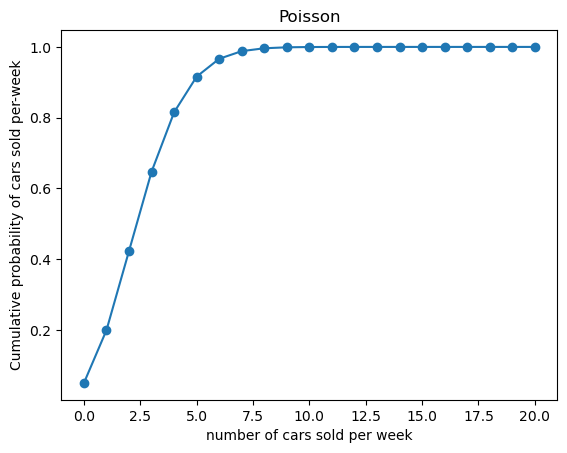

In [10]:
x = np.arange(0,21)

y = stats.poisson.cdf(x,lamda)
plt.plot(x,y, 'o-')
plt.title('Poisson')
plt.xlabel('number of cars sold per week')
plt.ylabel('Cumulative probability of cars sold per-week')
plt.show()

# Part A:Q:4. Accuracy in understanding orders for a speech based bot at a restaurant is important for the Company X which has designed,marketed and launched the product for a contactless delivery due to the COVID-19 pandemic. Recognition accuracy that measures the percentage of orders that are taken correctly is 86.8%. Suppose that you place an order with the bot and two friends of yours independently place orders with the same bot. Answer the following questions.

### Q4:A. What is the probability that all three orders will be recognised correctly?

In [11]:
p = 0.868
k = np.arange(0,4)
n=3
binomial = stats.binom.pmf(k,n,p)
print('Probability that all three orders will be recognised correctly is: ', round((binomial[3]),4))


Probability that all three orders will be recognised correctly is:  0.654


### Q4:B. What is the probability that none of the three orders will be recognised correctly? 

In [12]:
print('Probability that all three orders will be recognised correctly is: ', round((binomial[0]),4))

Probability that all three orders will be recognised correctly is:  0.0023


### Q4:C. What is the probability that at least two of the three orders will be recognised correctly?

In [13]:
binomial_cum_2plus = stats.binom.cdf(1,n,p)
print('Probability that at least two of the three orders will be recognised correctly is: ', round((1-binomial_cum_2plus),4))

Probability that at least two of the three orders will be recognised correctly is:  0.9523


# Part A:Q5 Explain 1 real life industry scenario (other than the ones mentioned above) where you can use the concepts learnt in this module of Applied Statistics to get data driven business solution.


#### Industry: Logistics and supply chain
#### Opportunity : 
In logistics and supply chain (in my organisation), operational load i.e. shipments increases high for certain peak seasons and reduces at certain ocassions. Company wants to be ready with both the situations. 

#### Route optimization
We can do hypothesis testing & Probability distribution for finding best routes.
Probability can be helpful in predicting the efficient delivery routes considering various parameters such as traffic, weather, and package destinations. By analyzing historical data and using probability models, logistics company can optimize routes to minimize delivery times and fuel consumption

#### Applied Statistics usage for shipment volume analysis
1. Visualisation techniques to be used for showing descriptive statistics to management to have feel of past trends. Multiple parameters like seasonality, temperature changes, festivals trend can be used to past shipment volume trend.
2. Hypothesis testing can be used to prove if shipment load increases for certain season like Christmas, festivals like Diwali etc. Also hypothesis can be tested if volume decreses in rains. Existing sample data can be used to prove the hypothesis.
3. Probability distribution can be used to estimate variation in shipment volume as per seasons based on past data.


#### Transit time forecast in logistics
Also we have transit time variations based on various parameters. So various sample (history) data can be analysed to find parameters impacting transit time. This analysis can be used for hypothesis tetsing and probability distributions for transit time predictions in various scenarios.
1. Find mean, standard deviation in transit time from available dataset collected.
 Define null hypothesis stating average transit time equal to computed mean.
 Test hypothesis using Z test and also using two sample t test.
 There will be various categorical variables considered for these tests.
2. Use various probabilities to determine shipments will be delivered on time or not based on past data samples.



# PartB - Q1 : Read the data set, clean the data and prepare final dataset to be used for analysis
1. Handle missing values
2. Adjust datatypes of columns
3. Split TeamLaunch column
4. Find win percentage of the teams

#### Steps we will perform on dataset to make it usable for EDA
1. Drop null values if any
2. Format Team lauch column to have one separator '-'. Split Team launch column into two numeric columns (From Year and To Year)
3. Convert all relevant columns to int (numeric) type
4. Add new columns for : WinPercentage, WinLossRatio, BasketScoredToGiven ratio to find best performance
5. Add new column "Age" by substracting current year from 'FromYear'

In [14]:
# PartB - 1 :Read data
data = pd.read_csv('Basketball.csv')
data.head()

Team  Tournament Score PlayedGames WonGames DrawnGames LostGames  \
0  Team 1          86  4385        2762     1647        552       563   
1  Team 2          86  4262        2762     1581        573       608   
2  Team 3          80  3442        2614     1241        598       775   
3  Team 4          82  3386        2664     1187        616       861   
4  Team 5          86  3368        2762     1209        633       920   

  BasketScored BasketGiven TournamentChampion Runner-up TeamLaunch  \
0         5947        3140                 33        23       1929   
1         5900        3114                 25        25       1929   
2         4534        3309                 10         8       1929   
3         4398        3469                  6         6   1931to32   
4         4631        3700                  8         7       1929   

   HighestPositionHeld  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

In [15]:
# PartB - 1 : checking shape of the data
data.shape

(61, 13)

In [16]:
#PartB - 1 : Checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


In [17]:
# PartB - 1 :Check for missing data
data.isnull().sum()
data['Score'].unique()
data[data['Score'] == '-']
data['PlayedGames'].unique()
data['WonGames'].unique()
data['DrawnGames'].unique()

array(['552', '573', '598', '616', '633', '531', '608', '577', '522',
       '440', '392', '389', '384', '336', '358', '327', '330', '292',
       '256', '242', '172', '175', '148', '180', '112', '149', '128',
       '143', '81', '95', '102', '127', '92', '79', '76', '56', '63',
       '45', '46', '50', '44', '37', '27', '21', '16', '23', '24', '13',
       '14', '18', '6', '11', '10', '8', '5', '4', '-'], dtype=object)

In [18]:
# PartB - 1 :drop record for 'Team 61' as it does not add any value
data = data.drop(60).reset_index(drop=True)

# PartB - 1 :replace '-' by 0 in Tournament champion and Runner up column
data['TournamentChampion'].replace('-', 0, inplace = True)
data['Runner-up'].replace('-', 0, inplace = True)

In [19]:
# PartB - 1 :convert numeric values to int64
num_cols =  ['Score', 'PlayedGames', 'WonGames', 'DrawnGames', 'LostGames','BasketScored','BasketGiven','TournamentChampion','Runner-up']

for column in num_cols:
  data[column] = data[column].astype(int)

In [20]:
# PartB - 1 : Split TeamLaunchColumn to FromYear and ToYear
data['TeamLaunch'] = data['TeamLaunch'].str.replace('_', '-')
data['TeamLaunch'] = data['TeamLaunch'].str.replace('to', '-')
data['TeamLaunch'] = data['TeamLaunch'].str.replace('~', '-')
data['TeamLaunch'].unique()
data[['TeamLaunchFY', 'TeamLaunchTY']] = data["TeamLaunch"].str.split('-', expand = True)

# PartB - 1 :#Set ToYear value
for index, row in data.iterrows():
  if (row['TeamLaunchTY'] is None):
    data.loc[index, 'TeamLaunchTY'] = row['TeamLaunchFY']
  else:
    data.loc[index, 'TeamLaunchTY'] = '19' + row['TeamLaunchTY']
    
data['TeamLaunchFY'] = data['TeamLaunchFY'].astype(int)
data['TeamLaunchTY'] = data['TeamLaunchTY'].astype(int)
data['Age'] = datetime.date.today().year - data['TeamLaunchFY']

In [21]:
#Find conflict in games count data
data[data['PlayedGames'] != data['WonGames'] + data['LostGames'] + data['DrawnGames']]

Team  Tournament  Score  PlayedGames  WonGames  DrawnGames  LostGames  \
22  Team 23          17    662          652       189         148        305   

    BasketScored  BasketGiven  TournamentChampion  Runner-up TeamLaunch  \
22           760         1088                   0          0    1977-78   

    HighestPositionHeld  TeamLaunchFY  TeamLaunchTY  Age  
22                    8          1977          1978   46

In [22]:
#Find Win Performance%
data['WinPercentage'] = ((data['WonGames']/data['PlayedGames'])*100).round()

In [23]:
#Find Win Performance%
data['WinLost'] = ((data['WonGames']/data['LostGames'])*100).round()

In [24]:
#Find Score Performance%
data['BascetScoredToGiven'] = ((data['BasketScored']/data['BasketGiven'])*100).round()

# PartB - Q2 : Detailed statistical analysis and EDA

In [25]:
# PartB - 2 : Statistical analysis of dataset
data.describe(include='all').T

count unique     top freq         mean          std  \
Team                   60     60  Team 1    1          NaN          NaN   
Tournament           60.0    NaN     NaN  NaN    24.383333     26.88462   
Score                60.0    NaN     NaN  NaN       916.45  1138.342899   
PlayedGames          60.0    NaN     NaN  NaN        810.1   877.465393   
WonGames             60.0    NaN     NaN  NaN   309.033333   408.481395   
DrawnGames           60.0    NaN     NaN  NaN   192.083333   201.985508   
LostGames            60.0    NaN     NaN  NaN   308.816667   294.508639   
BasketScored         60.0    NaN     NaN  NaN      1159.35  1512.063948   
BasketGiven          60.0    NaN     NaN  NaN  1159.233333  1163.946914   
TournamentChampion   60.0    NaN     NaN  NaN         1.45      5.51554   
Runner-up            60.0    NaN     NaN  NaN     1.433333     4.574679   
TeamLaunch             60     44    1929   10          NaN          NaN   
HighestPositionHeld  60.0    NaN     NaN  NaN         7.05     5.315232   
TeamLaunchFY         60.0    NaN     NaN  NaN      1957.95    26.646732   
TeamLaunchTY         60.0    NaN     NaN  NaN  1948.783333    24.708533   
Age                  60.0    NaN     NaN  NaN        65.05    26.646732   
WinPercentage        60.0    NaN     NaN  NaN    31.316667     7.853514   
WinLost              60.0    NaN     NaN  NaN    76.766667    45.077849   
BascetScoredToGiven  60.0    NaN     NaN  NaN    80.466667    27.264223   

                        min      25%     50%      75%     max  
Team                    NaN      NaN     NaN      NaN     NaN  
Tournament              1.0      4.0    12.0     39.0    86.0  
Score                  14.0   104.25   395.5   1360.5  4385.0  
PlayedGames            30.0    115.5   424.5   1345.5  2762.0  
WonGames                5.0    34.75   124.0   432.75  1647.0  
DrawnGames              4.0    26.25    98.5    331.5   633.0  
LostGames              15.0    62.75   197.5    563.5  1070.0  
BasketScored           34.0    154.5   444.0  1669.75  5947.0  
BasketGiven            55.0    236.0   632.5  2001.25  3889.0  
TournamentChampion      0.0      0.0     0.0      0.0    33.0  
Runner-up               0.0      0.0     0.0      0.0    25.0  
TeamLaunch              NaN      NaN     NaN      NaN     NaN  
HighestPositionHeld     1.0      3.0     6.0     10.0    20.0  
TeamLaunchFY         1929.0  1934.75  1950.5  1977.25  2016.0  
TeamLaunchTY         1900.0   1929.0  1944.5  1963.25  1999.0  
Age                     7.0    45.75    72.5    88.25    94.0  
WinPercentage          17.0    27.75    30.5    33.25    60.0  
WinLost                24.0     56.0    64.0     81.5   293.0  
BascetScoredToGiven    38.0    65.75    74.0    83.25   189.0

### Univariate Analysis

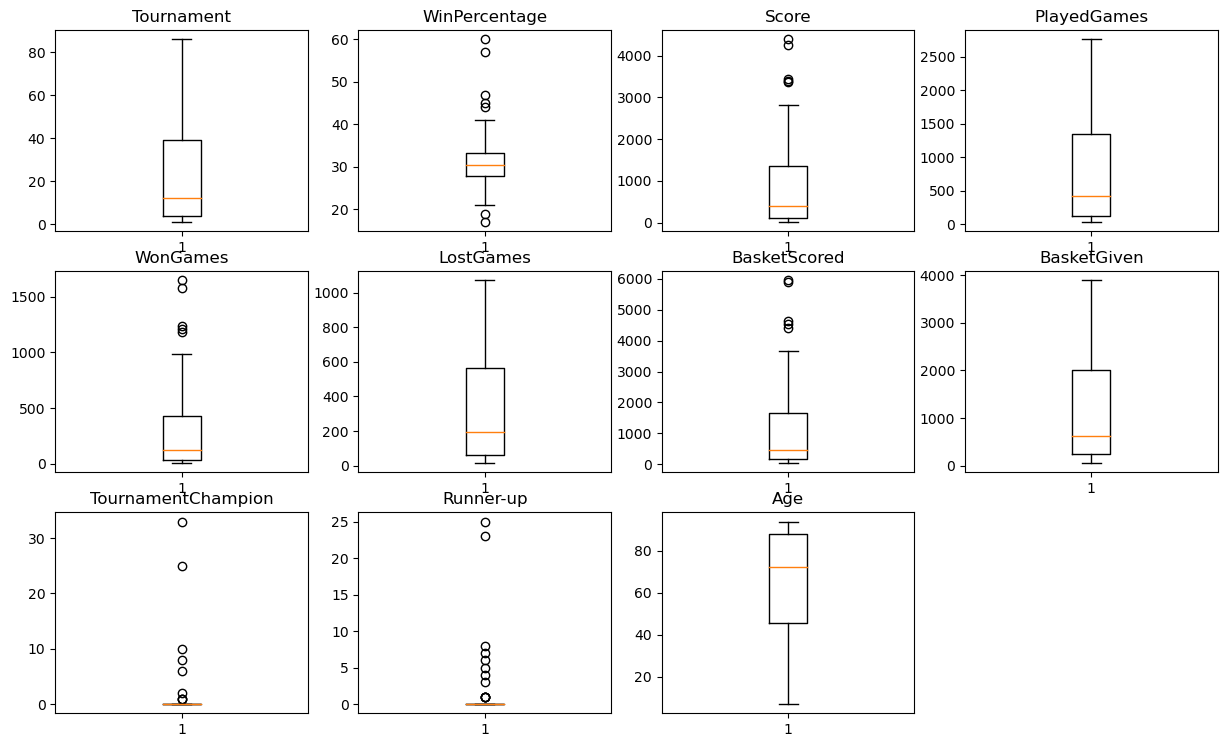

In [26]:
numeric_columns = ['Tournament', 'WinPercentage','Score', 'PlayedGames', 'WonGames','LostGames','BasketScored', 'BasketGiven','TournamentChampion','Runner-up','Age']
plt.figure(figsize=(15, 12))
for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    #plt.tight_layout();
    plt.title(variable)
plt.show();

__Observation__
Above set of box plots shows that theere are outliers score, basketsscored, Won games, tournament champions and runner-up columns. Rest of the data looks consistent. This shows performance related columns have some data points away from mean distribution. Right skewness in almost all boxplots shows few teams has more distribution for almost all variables. Example; Few teams played mosttornaments whereas most have played less.  
Too many outliers in WinPercentage shows few teams have outperformed.

Lets find data distribution of numeric variables using hostoplot

C:\Users\prash\AppData\Local\Temp\ipykernel_16068\3265475647.py:6: UserWarning:

The figure layout has changed to tight

C:\Users\prash\AppData\Local\Temp\ipykernel_16068\3265475647.py:6: UserWarning:

The figure layout has changed to tight

C:\Users\prash\AppData\Local\Temp\ipykernel_16068\3265475647.py:6: UserWarning:

The figure layout has changed to tight

C:\Users\prash\AppData\Local\Temp\ipykernel_16068\3265475647.py:6: UserWarning:

The figure layout has changed to tight

C:\Users\prash\AppData\Local\Temp\ipykernel_16068\3265475647.py:6: UserWarning:

The figure layout has changed to tight

C:\Users\prash\AppData\Local\Temp\ipykernel_16068\3265475647.py:6: UserWarning:

The figure layout has changed to tight

C:\Users\prash\AppData\Local\Temp\ipykernel_16068\3265475647.py:6: UserWarning:

The figure layout has changed to tight

C:\Users\prash\AppData\Local\Temp\ipykernel_16068\3265475647.py:6: UserWarning:

The figure layout has changed to tight



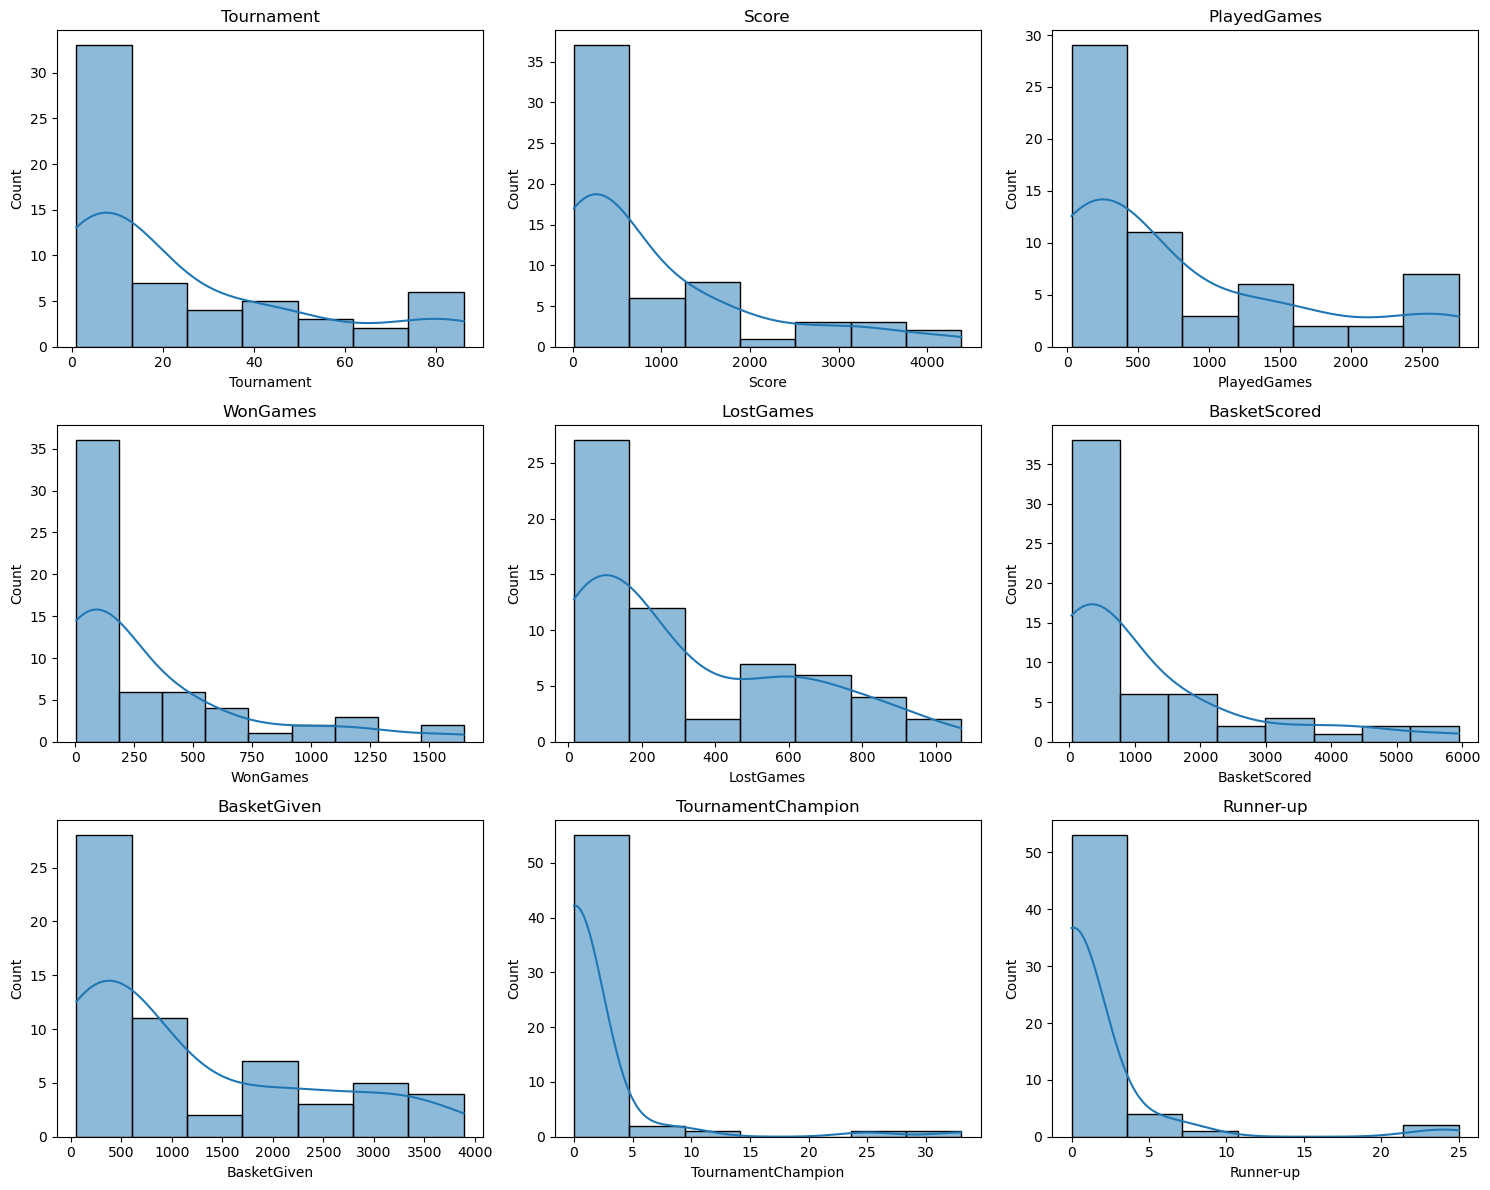

In [27]:
numeric_columns = ['Tournament', 'Score', 'PlayedGames', 'WonGames','LostGames','BasketScored', 'BasketGiven','TournamentChampion','Runner-up']
plt.figure(figsize=(15, 12))
for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[variable], kde=True)
    plt.tight_layout();
    plt.title(variable);
plt.show();

__Findings__ 
Histoplot shows right skewness for all variables except tournament champion and runner-up columns.
This states that very few teams have maximum frequencies for most of the variables.
Again, right skewness in almost all boxplots shows few teams has more distribution for almost all variables. Example; Few teams played mosttornaments whereas most have played less.

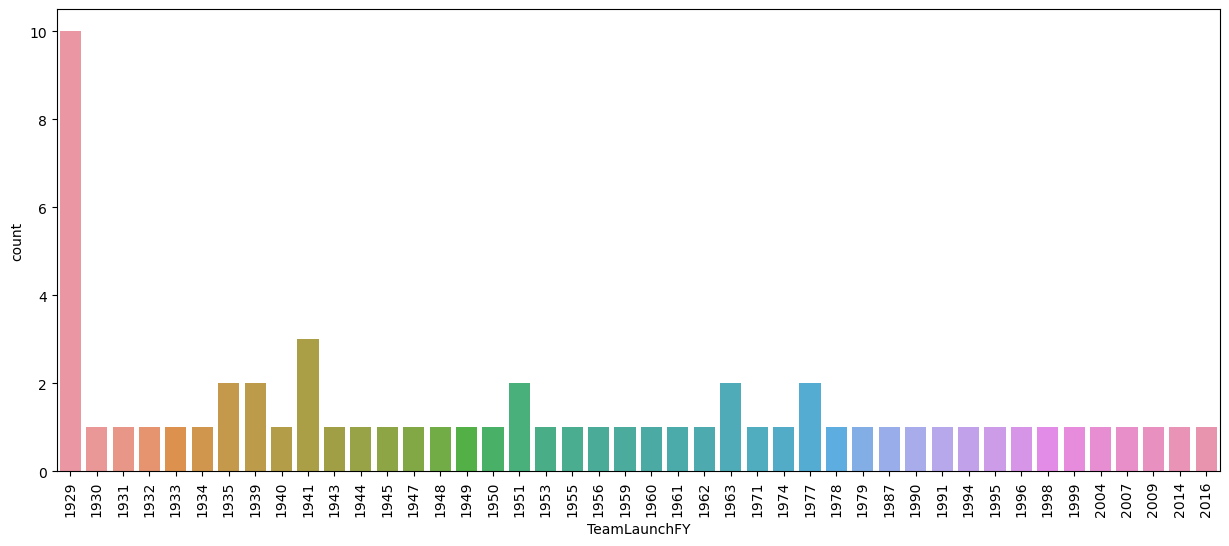

In [28]:
#Lets see yearwise counts for teams launched
plt.figure(figsize=(15, 6))
sns.countplot(data=data.sort_values(by='TeamLaunchFY', ascending=True) , x='TeamLaunchFY')
plt.xticks(rotation=90);
plt.show()

__Findings__
Above histoplot shows most of the teams have been launched in thge period of 1929. Thereafter, every year there is consistent addition of few teams till 2016.

### Bivariate analysis

In [29]:
# PartB - 2 : Lets see teams with most baskets scored adjacent to baskets given 
#,customdata=data['WinPercentage'], hovertemplate= '%{x}, %{y}, %{customdata}'

#We will be using plotly bar chart to show comparison of two similar variables Baskets scored and given. 
#This will help us about comparison on attack and defense of teams.
#Fig.add_trace help to show adjacent charts and also grouping of bars
fig = go.Figure()
fig.add_trace(go.Bar(
    x=data['Team'],
    y=data['BasketScored'],
    name='BasketScored',
    marker_color='royalblue'
))
fig.add_trace(go.Bar(
     x=data['Team'],
    y=data['BasketGiven'],
    name='BasketGiven',
    marker_color='deepskyblue'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(autosize=False,width=1900,height=500, barmode='group', xaxis_tickangle=-45, title_text="Baskets scored / Baskets given Comparison")
fig.show()

__Findings__
Above bar plot clarly states that Team1 and Team2 are best in terms of baskets scored and also they have excellent baskets scord to given ratio. Team5, Team3, Team4 and Team21 are also good score to given ratio. However same for rest of the teams <=50.

In [30]:
# PartB - 2 : Lets find best performing teams(win %) considering number of played game           
#We will be adding third variable played games to give better judgement as win % makes sense if played games are enough to judge performance 


plot_data=data.sort_values(by='WinPercentage', ascending=False)

hovertemp= 'Team:%{x}, WinPercentage%{y}, PlayedGames: %{customdata[0]}, Age:%{customdata[1]}'
fig = px.bar(plot_data, x="Team", y='WinPercentage',custom_data=['PlayedGames','Age'])
fig.update_traces(hovertemplate=hovertemp, text= ('Games: ' + plot_data['PlayedGames'].astype('string')),textposition="inside")
fig.update_layout(autosize=False,width=1300,height=500, title_text="Winning Percentage (With Played Games)")
fig.show()

__Findings__
We have included playedGames and Age variable on hover text and inside bars to have better visibility and to judge in better way so that win% is justified with enough games played.
Above bar plot states that Team1 is best performer as they have won maximum number of games and also their winning rate is best. Team2 is also not far behind at no#2 in terms of winning rate and won games.
However, Team21 is also having good win percentage despite of the fact they have played fewer games and also they are relatively new team.
Team60 has lowest win percentage having played 30 games. Followed by Team55 having second lowest winning percentage having played 68 games.

In [31]:
# PartB - 2 : Lets find teams with most title wins
specs = [[{'type':'pie'}] * 2] * 1
fig = make_subplots(rows=1, cols=2, specs=specs)

fig.add_trace(go.Pie(
     values=data[data['TournamentChampion']>0]['TournamentChampion'], labels=data['Team'], title='TournamentChampion',
     domain=dict(x=[0.5, 1]),
     name="TournamentChampion"), 
     row=1, col=1)

fig.add_trace(go.Pie(
     values=data[data['Runner-up']>0]['Runner-up'], labels=data['Team'], title='Runner-up',
     domain=dict(x=[0.5, 1.0]),
     name="Runner-up"),
    row=1, col=2)

fig.show()

__Findings__
Above pie charts clearly states that Team1 has won most tournament champion title whereas Team2 has been runner-up for most number of times. Team3, Team5 and Team4 are also consistent with title wins.

In [32]:
# PartB - 2 : Lets define a function for displaying labels at the top for barplot
def display_figures(ax,df,col):
    #show=df.to_list()
    i=0
    
    for p in ax.patches:
        h=p.get_height()
        if (h>0):
            value=df.loc[i,col]
            if(col=='WinPercentage'):
                ax.text(p.get_x()+p.get_width()/2,h+2,str(round(value)) + '%' , ha='center', rotation='vertical')
                #ax.text(p.get_x()+p.get_width()/2,h+0.9,str(round(value)) , ha='center', rotation='vertical')
            else:
                ax.text(p.get_x()+p.get_width()/2,h+0.9,value , ha='center',rotation='vertical')            
            i=i+1


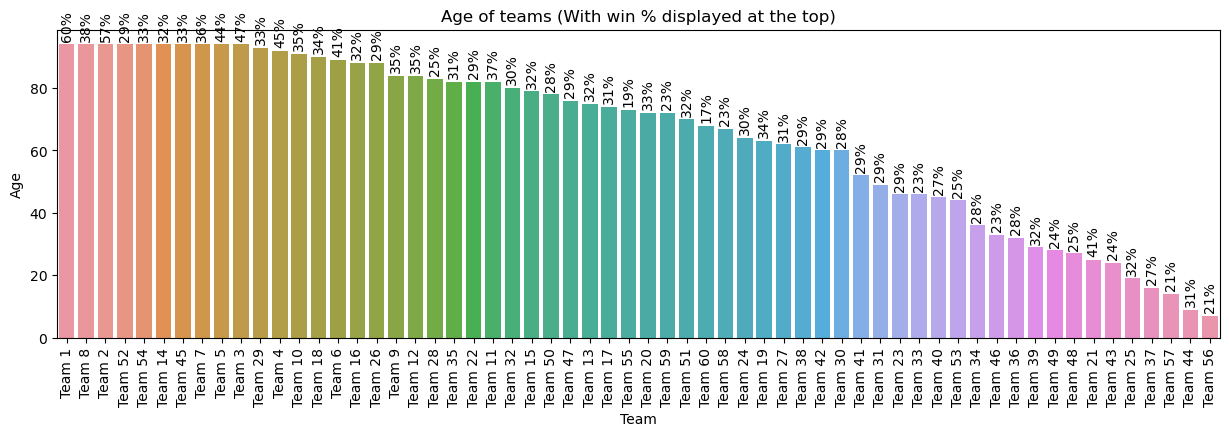

In [33]:
#Lets find Oldest teams along with their respective win %

plt.figure(figsize=(15,4))
plot_dataLow = data.sort_values(by='Age', ascending=False).reset_index()
barplt = sns.barplot(data=plot_dataLow, x='Team',y='Age')
barplt.set_title('Age of teams (With win % displayed at the top)')
plt.xticks(rotation=90);
display_figures(barplt,plot_dataLow,'WinPercentage')


__Findings__
Above barplot shows age of the teams from oldest to newest manner. We wanted to add parameter win% as we want to see their performances matured with age or not. It certainly has matured for teams like Team1, Team2. Team21 having good rate even though they are new team.

In [34]:
#Lets find parameter that impacts win% using heatmap and then we  will plot scatterplot to confirm correlation 
data[['BascetScoredToGiven','Age','Tournament','WinPercentage','WinLost','TournamentChampion','Runner-up','BasketScored','BasketGiven']].corr()
fig = px.scatter(data, x="BascetScoredToGiven", y="WinPercentage", trendline="ols")
fig.update_layout(autosize=False,width=500,height=400)
fig.show()

fig = px.scatter(data, x="WinLost", y="TournamentChampion", trendline="ols")
fig.update_layout(autosize=False,width=500,height=400)
fig.show()


__Findings__
From the correlation table and from the above scatterplot, we observed that, win percentage is having high correlation with high basket scored to given ratio. Meaning, those teams who have good attack with good defence has out performed. Whereas, Ratio of win to loss positively impact tournament champion variable.

In [35]:
#Let us now see comparison for win and loss for each teams
fig = go.Figure()
fig.add_trace(go.Bar(
    x=data['Team'],
    y=data['WonGames'],
    name='Won Games',
    marker_color='royalblue'
))
fig.add_trace(go.Bar(
     x=data['Team'],
    y=data['LostGames'],
    name='Lost Games',
    marker_color='deepskyblue'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(autosize=False,width=1900,height=500, barmode='group', xaxis_tickangle=-45,title_text="Win/Loss Comparison")
fig.show()

__Findings__  
We can infer that Team1 has great win to lose ratio. Same with Team2, Team3, Team4, Team5, Team6. Team 21 is also good with win to lose ration.

### Multivariate analysis

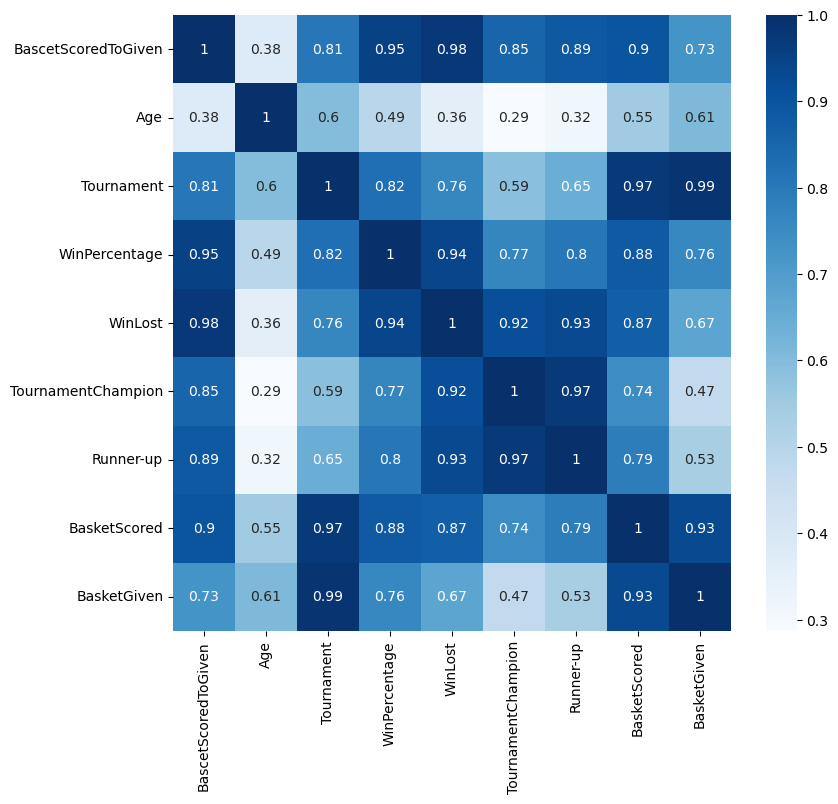

In [36]:
#Lets find correlation of all numeric variables using heat map
plt.figure(figsize = (9,8))
sns.heatmap(data[['BascetScoredToGiven','Age','Tournament','WinPercentage','WinLost','TournamentChampion','Runner-up','BasketScored','BasketGiven']].corr(numeric_only=True), annot=True, cmap="Blues")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



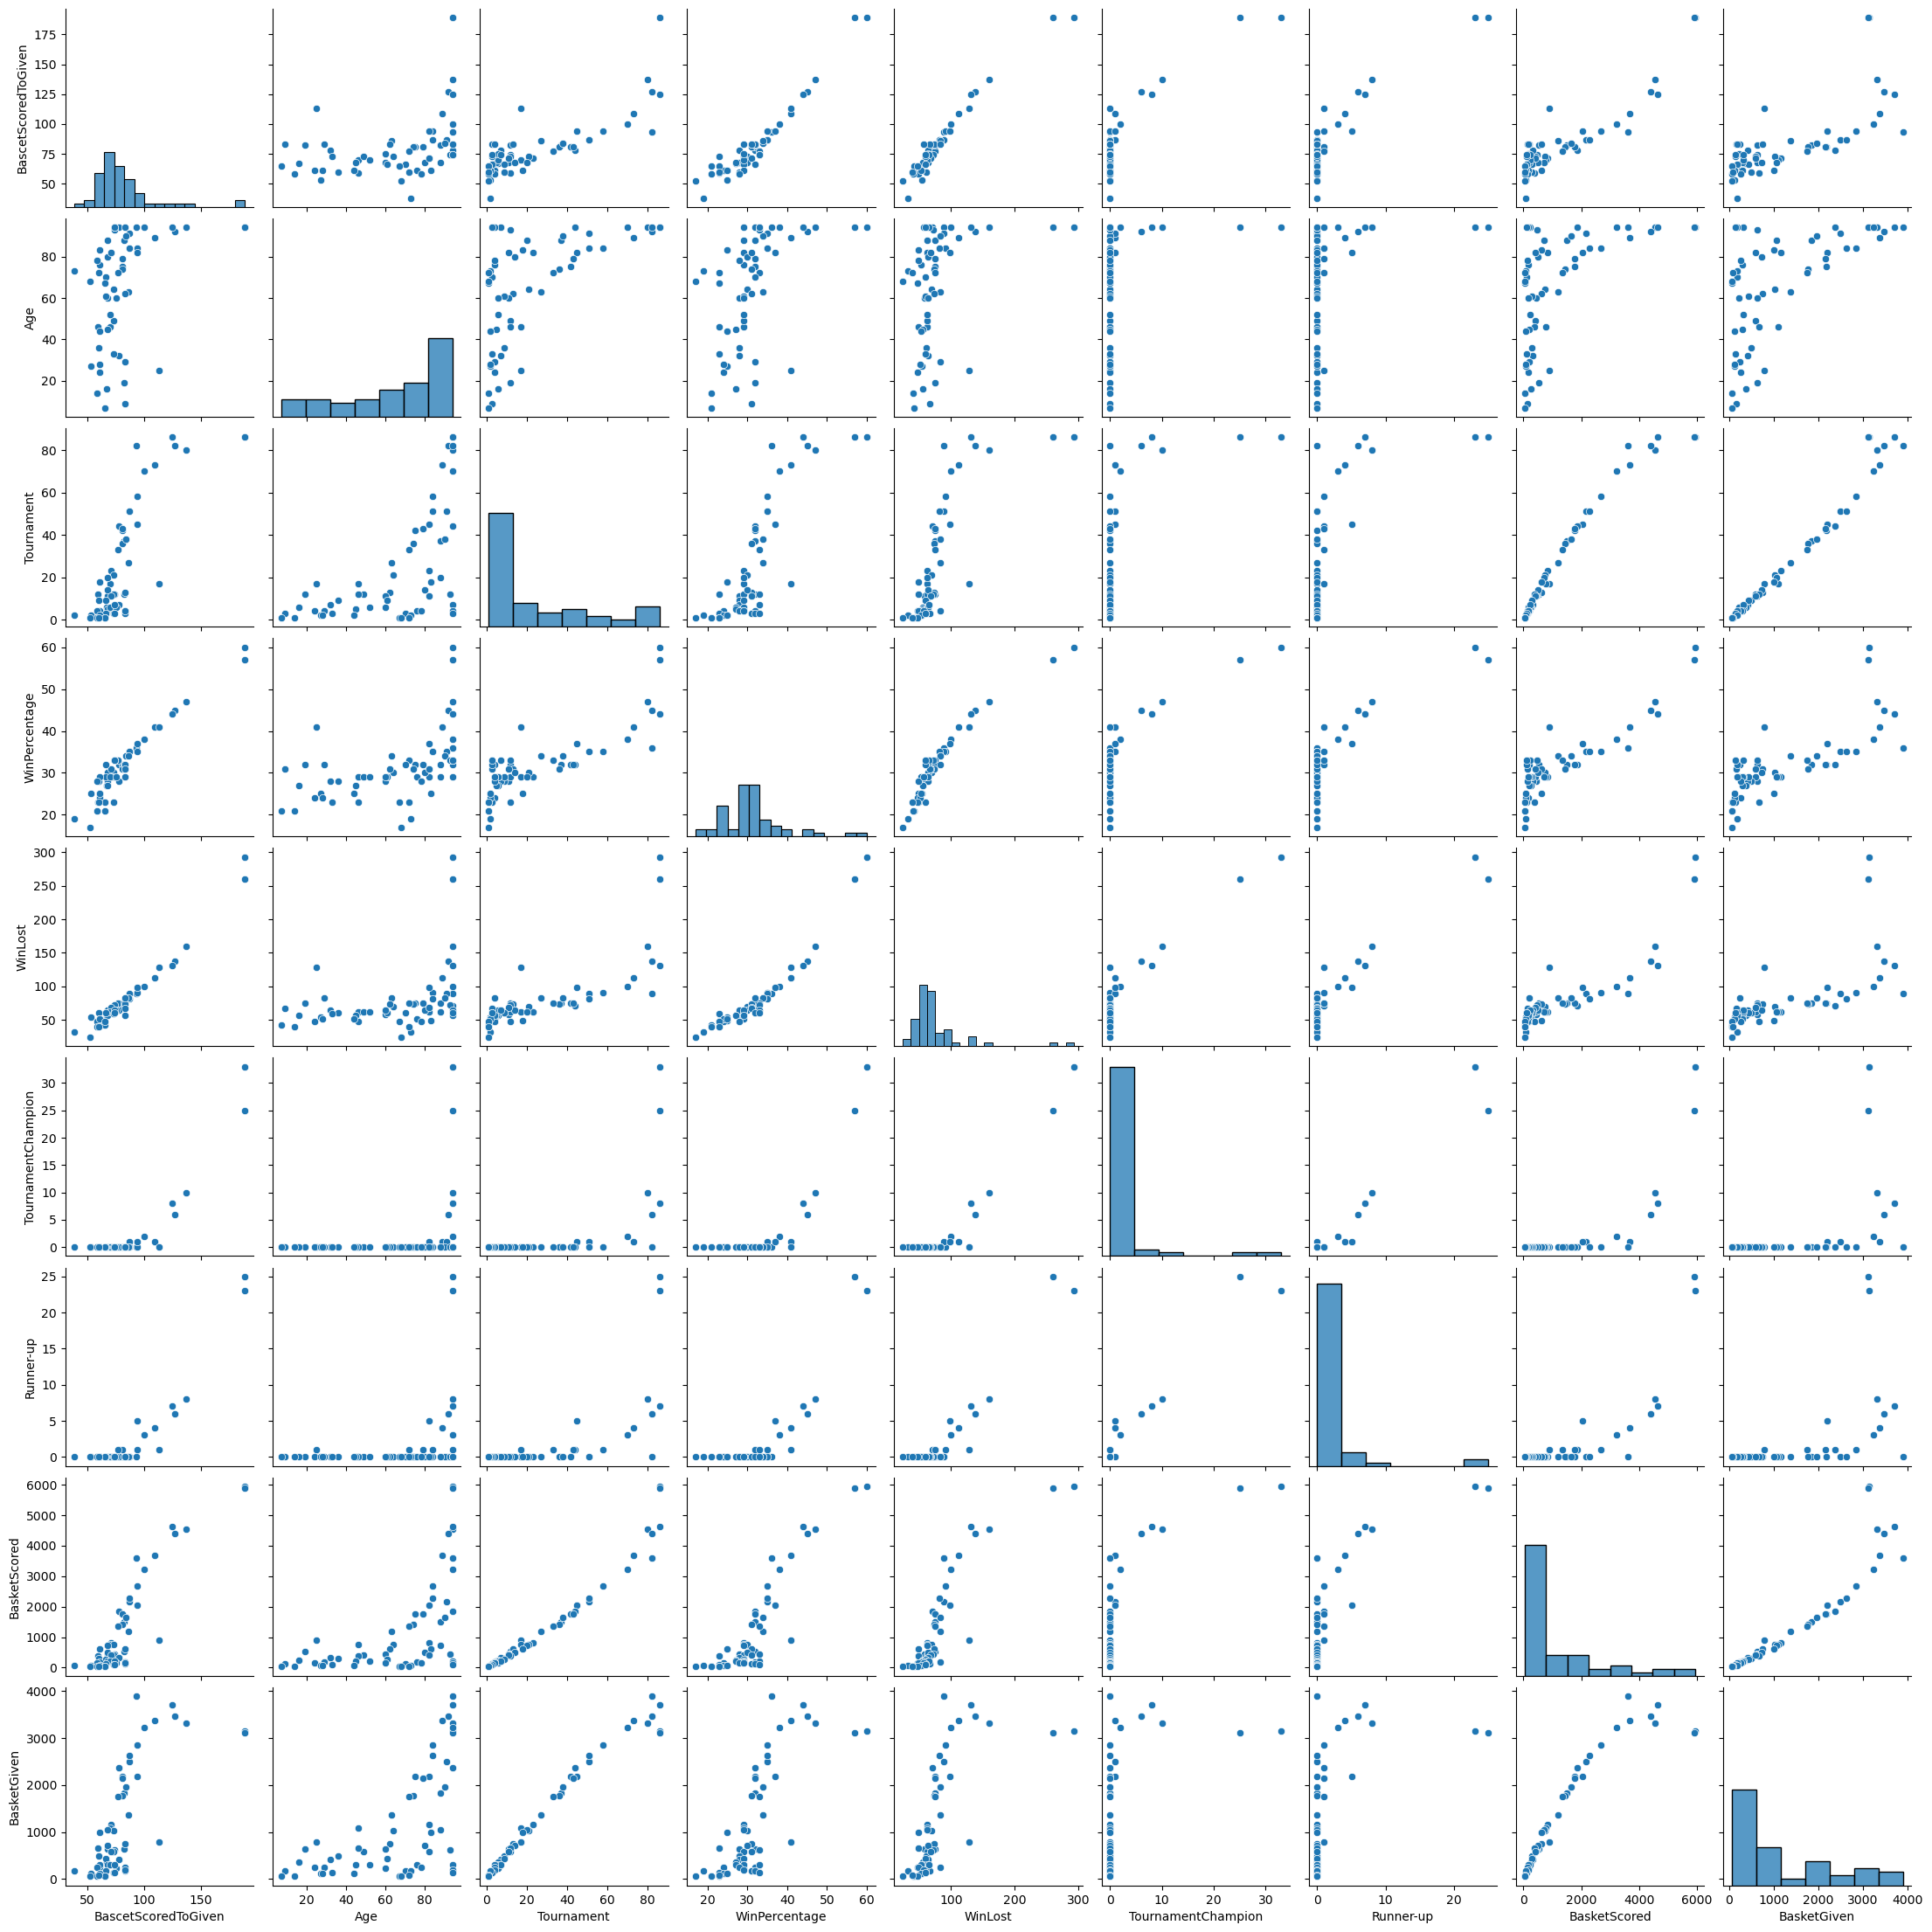

In [37]:
#Lets find correlation using pair plot
sns.pairplot(data[['BascetScoredToGiven','Age','Tournament','WinPercentage','WinLost','TournamentChampion','Runner-up','BasketScored','BasketGiven']])

__Findings__
Above heatmap and pairplot states that there is high correlaton between BasketsScoredtoGiven ratio, WinLost ratio, WinPercentage, tournamentChampion, runner-up.

## Overall conclusion about basketball dataset

__Recommendation__
Looking at the data, Team1 is found to be best not only in winning matches and scoring baskets but also they are best in winning the tournament titles. Also, Team2 have been consistently performing in all aspects after Team1.
However, its Team21 who has done exceptional with good winning rate having played fewer games and they are relatively new team. This shows Team 21 is upcoming team. 
Hence its recommended that Team1, Team2 and Team21 can be good deal win. So these three teams specially Team21 can be considered for deal. 

__Detailed Performance Report__
Overall, very few teams have outperformed the game as they have played most number of matches. Whereas most of the teams are having average performances.  
Teams having good attack(baskets scored) and equally good defence(baskets given) has outperformed.
1. Team1 is best performer most number of games won, most number of Baskets scored, best 'baskets scored' to 'Baskets given' ratio. Also they have most number of tournamentchampion titles. 
2. Team2 is second best team in term. They were runner-up most times.
3. Team21 has excellent win percentage despite of the fact they have played fewer games and also they are relatively new team. This shows, that Team 21 is upcoming team to lookout for.
3. Whereas Team60 has lowest winning rate. 
4. Team1, Team2, Team5, team3, Team4 has outperformed in terms of games won, most number of Baskets scored, best 'baskets scored' to 'Baskets given' ratio and tournaments champion.
5. Team1, Team2, Team8, team52, Team54, Team14, Team45, Team7, Team3 are oldest in the history

# Part B Q3 Please include any improvements or suggestions to the association management on quality, quantity, variety, velocity, veracity etc. on the data points collected by the association to perform a better data analysis in future. At-least 1 suggestion for each point.

#### Variety
We have data that can used for checking overlall performance. However we need data diverity in terms of data at games level, individual level to inspect at deep level. In fact it will be very easy to find out which team /individual is doing good if we have data at each game level.
1. Dataset provided is performance data against each team. However it is suggested to collect the data at games/tournaments level including date/time period for each games. We observed that Team1 and Team2 are best performers. However we couldn't find that these teams are best in recent times. Game level data can help with timely performance of each teams.
2. Also, it would be great to collect individuals performance. This will help to identify individual plaers those can be considered for engagements.
#### Veracity/Quality
1. It has been observed that 1 Team record having missing data. Secondly team launch column data was not in ideal format. These things needs to be taken care while data capture.
2. We found some conflicts in counts of Team23 games. Count of won games, lost games and drawn games was not matching with played games count. Hence there is possibility where few games could have been cancelled. However, no other teams have this conflict in other teams games count. This mean there is incosistency in data captured.
3. Data like score, positions held, team launch not adding up any value
#### Volume/Quantity
1. Quantity of data seems to be okay if we are considering teams overall performance. 
#### Velocity
1. There should be timely addition of transactional data at near real time. 
   This will help to deep dive and to identify timely performance of teams and individuals.
#### Value
In the current data, team lauch does not add large value. However, below data points can be beneficial 
1. Fixtures data for future : This is for better planning
2. Game level transactional data
3. Individuals performance data
3. Physical fitness and injury history of individuals

# Part C

### Q1 Read the CSV file

In [38]:
dataComp = pd.read_csv('CompanyX_EU.csv')
dataComp.head()

Startup             Product Funding             Event  \
0           2600Hz          2600hz.com     NaN   Disrupt SF 2013   
1             3DLT            3dlt.com   $630K  Disrupt NYC 2013   
2      3DPrinterOS     3dprinteros.com     NaN   Disrupt SF 2016   
3       3Dprintler      3dprintler.com     $1M   Disrupt NY 2016   
4  42 Technologies  42technologies.com     NaN  Disrupt NYC 2013   

            Result OperatingState  
0       Contestant      Operating  
1       Contestant         Closed  
2       Contestant      Operating  
3  Audience choice      Operating  
4       Contestant      Operating

### Q2 Data Exploration

### A. Check the datatypes of each attribute

In [39]:
#A.Check the datatypes of each attribute
dataComp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         662 non-null    object
 1   Product         656 non-null    object
 2   Funding         448 non-null    object
 3   Event           662 non-null    object
 4   Result          662 non-null    object
 5   OperatingState  662 non-null    object
dtypes: object(6)
memory usage: 31.2+ KB


All the attributes are of 'object' type

### B.Check for null values in the attributes

In [40]:
#B.Check for null values in the attributes
dataComp.isnull().sum()

Startup             0
Product             6
Funding           214
Event               0
Result              0
OperatingState      0
dtype: int64

Funding has null values in 214 rows whereas Product has null values in 6 rows.

### Q3:Data preprocessing & visualisation

### A. Drop the null values

In [41]:
dataComp.dropna(inplace=True)
dataComp.isnull().sum()


Startup           0
Product           0
Funding           0
Event             0
Result            0
OperatingState    0
dtype: int64

### B. Convert the ‘Funding’ features to a numerical value

In [42]:
dataComp.loc[:,'Funds_in_million'] = dataComp['Funding'].apply(lambda x: float(x[1:-1])/1000 if x[-1] == 'K' else (float(x[1:-1])*1000 if x[-1] == 'B' else float(x[1:-1])))
dataComp.head()

Startup          Product Funding                      Event  \
1           3DLT         3dlt.com   $630K           Disrupt NYC 2013   
3     3Dprintler   3dprintler.com     $1M            Disrupt NY 2016   
5           5to1         5to1.com  $19.3M                  TC50 2009   
6   8 Securities  8securities.com    $29M       Disrupt Beijing 2011   
10    AdhereTech   adheretech.com   $1.8M  Hardware Battlefield 2014   

             Result OperatingState  Funds_in_million  
1        Contestant         Closed              0.63  
3   Audience choice      Operating              1.00  
5        Contestant       Acquired             19.30  
6          Finalist      Operating             29.00  
10       Contestant      Operating              1.80

### C. Plot box plot for funds in million

In [43]:
# sns.boxplot(data=dataComp, x='Funds_in_million')
fig = px.box(dataComp, x="Funds_in_million")
fig.show()


### D. Check the number of outliers greater than the upper fence

In [44]:
Q1 = dataComp['Funds_in_million'].quantile(0.25) #Whisker1 
Q3 = dataComp['Funds_in_million'].quantile(0.75) #Whisker2
IQR = Q3 - Q1 #InterQuartileRange
UpperFence = Q3 + 1.5*IQR
print('Number of outliers greater than the upper fence: ', (dataComp['Funds_in_million'] > UpperFence).sum())

Number of outliers greater than the upper fence:  60


There are 60 outliers outside upper fence for Funds_in_million variable.

### E. Check frequency of the OperatingState features classes.

In [45]:
dataComp['OperatingState'].value_counts()
fig = px.histogram(dataComp, x="OperatingState")
fig.show()
dataComp.groupby('OperatingState')['OperatingState'].value_counts()


OperatingState
Acquired      66
Closed        57
Ipo            4
Operating    319
Name: count, dtype: int64

319 startups are operating whereas 57 starups have been closed. 66 startups have been acquired. 4 startup IPO released.

### Q4:A. Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down?

In [46]:
fig = px.histogram(dataComp, x="OperatingState", y='Funds_in_million')
fig.show()
dataComp.groupby('OperatingState')['Funds_in_million'].sum()

OperatingState
Acquired      872.0510
Closed        185.7157
Ipo           551.1000
Operating    6080.8372
Name: Funds_in_million, dtype: float64

__Findings__
Above plot shows that there is significant difference between Funds raised by companies that are still operating vs companies that closed down. However, we understand that this inference is based on sample data that we have. We would need to perform hypothesis testing to infer about the same question for population.

### Q4:B. Write the null hypothesis and alternative hypothesis. 

Null hypothesis (H0): There is no difference between the two means (Funds raised by companies that are still operating vs companies that closed down).  
Mu_operating = Mu_Closed
Alternate hypothesis   
Alternate Hypothesis(Ha) : Two means are not equal. Mu_operating is not equal to Mu_Closed

### Q4:C. Test for significance and conclusion

In [47]:
#alpha value = 0.0025 as this is two tailed test
Operating = dataComp[dataComp['OperatingState']=='Operating']['Funds_in_million']
Closed = dataComp[dataComp['OperatingState']=='Closed']['Funds_in_million']
t_statistic, p_value  = ttest_ind(Operating,Closed)
print('tstat',t_statistic)    
print('P Value',p_value) 
Operating.mean()
Closed.mean()

tstat 1.1382924515740138
P Value 0.25572701885629406


3.2581701754385963

As p_value(0.25) is great than alpha (0.0025), we failed to reject null hypothesis. Therefore we can conclude that there is no significant difference between means of Funds raised by companies that are still operating vs companies that closed down.

### Q4:D. Make a copy of the original data frame.

In [48]:
dfCopy = dataComp.copy()

### Q4:E. Check frequency distribution of Result variables.

In [49]:
fig = px.histogram(dfCopy, x="Result")
fig.show()

### Q4:F. Calculate percentage of winners that are still operating and percentage of contestants that are still operating

In [50]:
op_winners = dfCopy[(dfCopy.Result=='Winner') & (dfCopy.OperatingState=='Operating')].Result.value_counts()[0]
op_contestants = dfCopy[(dfCopy.Result=='Contestant') & (dfCopy.OperatingState=='Operating')].Result.value_counts()[0]
Operating = dfCopy[dfCopy.OperatingState=='Operating'].OperatingState.value_counts()[0]
Total_Winners = dfCopy[(dfCopy.Result=='Winner')].Result.value_counts()[0]
Total_contestants = dfCopy[(dfCopy.Result=='Contestant')].Result.value_counts()[0]

print('Winners those are still operating', op_winners)
print('Contestants those are still operating', op_contestants)
print('Total operating startups', Operating)
print('Total Winners', Total_Winners)
print('Total contestants', Total_contestants)
print('percentage of winners that are still operating', (op_winners*100/Total_Winners).round(2))
print('percentage of contestants that are still operating', (op_contestants*100/Total_contestants).round(2))


Winners those are still operating 18
Contestants those are still operating 214
Total operating startups 319
Total Winners 25
Total contestants 312
percentage of winners that are still operating 72.0
percentage of contestants that are still operating 68.59


### Q4:G. Write your hypothesis comparing the proportion of companies that are operating between winners and contestants:

Null hypothesis (H0) = Proportion of companies that are operating between winners and contestants are same (Mu_win=Mu_cont).  
Alternate hypothesis (Ha) = Proportion of companies that are operating between winners and contestants are not same (Mu_win is no equal to Mu_cont)

### Q4:H. Test for significance and conclusion

In [51]:
#zstat, p_val = proportions_ztest([op_winners, op_contestants] , [Total_Winners, Total_contestants], alternative='two-sided')
zstat, p_val = proportions_ztest([18, 214] , [25, 312])
print ('zstat:', zstat, ' p value:', p_val)
print('As p value is greater than standard error(0.025), we failed to reject null hypothesis. Hence, we can conclude that there is no significant differance between proportion of companies that are operating between winners and contestants')

zstat: 0.3542506401722957  p value: 0.7231510556194248
As p value is greater than standard error(0.025), we failed to reject null hypothesis. Hence, we can conclude that there is no significant differance between proportion of companies that are operating between winners and contestants


### Q4:I. Select only the Event that has ‘disrupt’ keyword from 2013 onwards

In [52]:
#dataComp.drop('EventYear',axis=1)
#Lets write customized function to extract year value from 'Event' columns and lets convert it numeric
def converttoYr(str):
    if str != '-':
        return round(int(str[-4:]))
#Lets now apply this function
dataComp['EventYear'] = dataComp['Event'].apply(converttoYr)
#dataComp.head()
#dataComp[(dataComp['EventYear']>= 2013) & (dataComp['Event'].str.contains('Disrupt'))].head(2)
#Lets filter as per needful condition
dataComp[(dataComp['EventYear']>= 2013) & (dataComp['Event'].str.contains('Disrupt'))]['Event'] 

1         Disrupt NYC 2013
3          Disrupt NY 2016
13         Disrupt SF 2015
14     Disrupt London 2016
16         Disrupt SF 2015
              ...         
641       Disrupt NYC 2013
642        Disrupt SF 2014
646    Disrupt London 2015
656       Disrupt NYC 2013
660        Disrupt SF 2013
Name: Event, Length: 193, dtype: object

We noticed that there are total 193 rows that has disrupt keyword from 2013 onwards 